# Análise RFM

##### Rômulo Valle

## 1. O que é a Análise RFM?

A análise RFM é uma técnica de segmentação de clientes que utiliza três variáveis para classificar os clientes em grupos com base em seu comportamento de compra:

**Recency (R)**: representa o tempo desde a última compra do cliente. Quanto mais recente a compra, maior é a pontuação.

**Frequency (F)**: representa a frequência de compras do cliente em um determinado período de tempo. Quanto mais frequentes as compras, maior é a pontuação.

**Monetary Value (M)**: representa o valor monetário total gasto pelo cliente em compras. Quanto maior o valor gasto, maior é a pontuação.

Essas três variáveis são combinadas para gerar uma pontuação geral para cada cliente, que pode ser usada para classificar os clientes em grupos de alto valor, médio valor e baixo valor, ou em outros segmentos relevantes para a empresa. A análise RFM é uma ferramenta útil para identificar os clientes mais valiosos e para desenvolver estratégias de marketing e vendas mais eficazes.

## 2. Motivação



```
# Isto está formatado como código
```

#### 2.1 Contexto

Sob o ponto de vista acadêmico, a análise RFM tem sido objeto de estudo em diversas áreas, como marketing, gestão de relacionamento com clientes (CRM) e ciência de dados, por exemplo. Isso se deve ao fato de que a análise RFM é uma ferramenta eficaz para entender e prever o comportamento do consumidor, permitindo que as empresas direcionem seus esforços de marketing e vendas de forma mais eficiente e personalizada.

Já no mercado atual de Marketing e CRM, a análise RFM é uma técnica bastante utilizada por empresas de diversos setores, desde varejo até serviços financeiros e telecomunicações. Isso se deve ao fato de que a análise RFM permite que as empresas segmentem seus clientes de forma mais precisa, identificando aqueles que têm maior potencial de compra e que são mais valiosos para o negócio. Além disso, a análise RFM pode ser combinada com outras técnicas de análise de dados, como a análise preditiva e a modelagem de segmentação, permitindo que as empresas desenvolvam estratégias mais eficazes de marketing e vendas, aumentando a satisfação e fidelidade do cliente, bem como os resultados financeiros do negócio.

#### 2.2 Resumo do Algoritimo

O objetivo da análise consiste em segmentar os clientes segundo seu comportamento de compras em 9 categorias distintas.

O primeiro passo consiste na formatação do dataset. Uma das características fundamentais deste código é a limpeza e organização desta base de dados. Uma vez que todos os dados desta análise, quando aplicados em um ambiente de teste real, serão preenchidos por exemplo por funcionários de lojas ou até mesmo pelos clientes anaĺisados então muitas vezes podem ser computados de forma errada, principalmente com CFPs inválidos.

O segundo passo é a transformação do dataframe de pedidos, agrupando-o em clientes, uma vez que o dataset analisado inicia-se com o volume inicial de pedidos, e não a visão de clientes.

O último passo é a demonstração em gráficos e resumos de tabelas, deixando em próximos passos análises especfíficas para cada um dos segmentos realizados.

## 3. Algoritimo

#### 3.1 Instalação das Libraries

In [ ]:
!pip install pandas
!pip install numpy
!pip install random
!pip install string
!pip install datetime
!pip install faker
!pip install plotly.express
!pip install matplotlib.pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 16.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python

#### 3.2 Importação das Libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import string
from datetime import datetime
from datetime import timedelta
from faker import Faker
import plotly.express as px
import matplotlib.pyplot as plt

#### 3.2 Definição Inicial de Parâmetros da Análise

Inicialmente são definidos os parâmetros: o número de pedidos do dataframe que será gerado e as datas de início e fim para a análise dos dados de clientes.

O comentário que acompanha o código sugere uma alternativa para definir a data de início, que é utilizar a data atual menos um ano, e a data final como a data atual. Isso garante uma padronização para análises de um ano.

In [ ]:
# definição do número de pedidos do dataframe gerado
rows = 20000

# definição da data inicial
start_date = '2022-01-01'
# definição da data final da análise
end_date = '2022-12-01'

# para padronização de 1 ano de análise utilizar:
# data_atual = datetime.now().date()
# end_date = data_atual.strftime('%Y-%m-%d')
# start_date = (data_atual - timedelta(days=365)).strftime('%Y-%m-%d')

#### 3.3 Funções de Criação de Dataset de Pedidos

As funções create_dataset() e  create_dataset_problem() geram dois conjuntos de dados fictícios em formato de DataFrame. Elas recebem como entrada uma data inicial (start_date), uma data final (end_date) e um número de linhas (num_rows) que deve ser gerado no DataFrame.

Na inicial , é utilizada a biblioteca Faker para gerar dados fictícios, como nomes, endereços, CPFs, etc. Em seguida, define uma semente para gerar números aleatórios, cria uma lista de valores de pedido, e um dicionário para armazenar informações dos pedidos, como o código da filial, a data de emissão do pedido, o CPF do cliente e se a compra foi realizada pelo canal omnichannel ou não. A distinção para a segunda função é exatamente nesta biblioteca, uma vez que são gerados CPFs com letras ao lugar de números, mesmo que serão limpados a posteriori, isso é uma representação muito semelhante aos dados da companhia que tem muitos problemas com CPFs.

Depois, a função preenche o DataFrame com dados fictícios, utilizando a lista de valores de pedido e as informações do dicionário para criar uma tabela que contém informações como código da filial, valor do pedido, canal de compra, data de emissão do pedido, CPF do cliente e se a compra foi realizada pelo canal omnichannel ou não.

Finalmente, se o número de linhas não for um múltiplo do número de pedidos distintos gerados, a função preenche as linhas restantes com dados fictícios com CPFs distintos. O DataFrame é retornado como resultado da função.

In [ ]:
def create_dataset(start_date, end_date, num_rows):
    # Define uma semente para gerar números aleatórios
    random.seed(42)

    # Cria um objeto Faker para gerar dados fictícios
    fake = Faker('pt_BR')

    # Calcula o número de clientes distintos necessários
    num_clientes_distintos = int(num_rows * 0.8 / 5)

    # Cria uma lista com códigos de pedido e cpf para cada cliente
    clientes = []
    for i in range(num_clientes_distintos):
        cpf = fake.cpf()
        num_pedidos = random.randint(1, 4)
        pedidos = [str(random.randint(10000, 99999)) for _ in range(num_pedidos)]
        clientes.append({'cpf': cpf, 'pedidos': pedidos})

    # Cria um dicionário para armazenar as informações dos pedidos
    pedidos_info = {}
    for cliente in clientes:
        for pedido in cliente['pedidos']:
            codigo_filial = random.randint(1, 3)
            emissao = random.choice(pd.date_range(start=start_date, end=end_date))
            omni = random.choices([True, False], weights=[0.2, 0.8])[0]
            pedidos_info[pedido] = {'codigo_filial': codigo_filial, 'emissao': emissao, 'cpf': cliente['cpf'], 'omni': omni}

    # Cria um dataframe vazio com as colunas desejadas
    df = pd.DataFrame(columns=['CODIGO_FILIAL', 'PEDIDO', 'CANAL', 'OMNI', 'EMISSAO', 'CPF', 'VALOR'])

    # Preenche o dataframe com dados fictícios
    num_pedidos = len(pedidos_info)
    num_linhas_por_pedido = int(num_rows * 0.8 / num_pedidos)
    for i in range(num_rows):
        pedido = random.choice(list(pedidos_info.keys()))
        info = pedidos_info[pedido]
        codigo_filial = info['codigo_filial']
        emissao = info['emissao']
        cpf = info['cpf']
        omni = info['omni']
        valor = round(random.uniform(100, 1400), 2)
        df.loc[i] = [codigo_filial, pedido, 'LOJA', omni, emissao, cpf, valor]

    # Preenche o restante do dataframe com dados fictícios com cpfs distintos
    for i in range(num_rows - num_pedidos * num_linhas_por_pedido):
        emissao = random.choice(pd.date_range(start=start_date, end=end_date))
        cpf = fake.cpf()
        codigo_filial = random.randint(1, 3)
        pedido = random.choice(pedidos)
        omni = random.choices([True, False], weights=[0.2, 0.8])[0]
        valor = round(random.uniform(100, 1400), 2)
        df.loc[num_pedidos * num_linhas_por_pedido + i] = [codigo_filial, pedido, 'LOJA', omni, emissao, cpf, valor]

    return df



In [ ]:
def create_dataset_problem(start_date, end_date):
    # Define uma semente para gerar números aleatórios
    random.seed(42)

    # Cria um objeto Faker para gerar dados fictícios
    fake = Faker('pt_BR')

    # Cria uma lista com valores de pedido
    pedidos = [str(random.randint(10000, 99999)) for _ in range(5)]

    # Cria um dicionário para armazenar as informações dos pedidos
    pedidos_info = {}
    for pedido in pedidos:
        codigo_filial = random.randint(1, 3)
        emissao = random.choice(pd.date_range(start=start_date, end=end_date))
        cpf = fake.cpf()
        pedidos_info[pedido] = {'codigo_filial': codigo_filial, 'emissao': emissao, 'cpf': cpf}

    # Cria um dataframe vazio com as colunas desejadas
    df_problem = pd.DataFrame(columns=['CODIGO_FILIAL', 'PEDIDO', 'CANAL', 'OMNI', 'EMISSAO', 'CPF', 'VALOR'])

    # Preenche o dataframe com dados fictícios
    for i in range(1000):
        pedido = random.choice(pedidos)
        info = pedidos_info[pedido]
        codigo_filial = info['codigo_filial']
        emissao = info['emissao']
        if emissao >= pd.to_datetime(start_date) and emissao <= pd.to_datetime(end_date):
            cpf = ''.join(random.choices(string.ascii_letters, k=3)).upper() + '.' + \
                ''.join(random.choices(string.ascii_letters, k=3)).upper() + '.' + \
                ''.join(random.choices(string.ascii_letters, k=3)).upper() + '-' + \
                ''.join(random.choices(string.ascii_letters, k=2)).upper()
            valor = round(random.uniform(100, 1400), 2)
            df_problem.loc[i] = [codigo_filial, pedido, 'LOJA', True, emissao, cpf, valor]

    return df_problem

A seguir o DataFrame pedidos é criado a partir da concatenação dos DataFrames df e df_problem com a função pd.concat(), que une os dois DataFrames ao longo do eixo 0 (concatenação por linha).

In [ ]:
#chama as funções de geração de dataframes e concatena-os
df = create_dataset(start_date, end_date, rows)
df_problem = create_dataset_problem(start_date, end_date)
pedidos = pd.concat([df, df_problem], axis=0)
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CODIGO_FILIAL  21000 non-null  int64         
 1   PEDIDO         21000 non-null  object        
 2   CANAL          21000 non-null  object        
 3   OMNI           21000 non-null  bool          
 4   EMISSAO        21000 non-null  datetime64[ns]
 5   CPF            21000 non-null  object        
 6   VALOR          21000 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.1+ MB


#### 3.4 Funções de limpeza e preparação de dados

A função "validar_cpf" é utilizada para validar a formatação e os dígitos verificadores de um número de CPF. Ela recebe como parâmetro uma string representando um número de CPF e utiliza expressões regulares para remover pontos e outros caracteres especiais. Em seguida, é verificado se o CPF possui 11 dígitos numéricos e se não é um número repetido. A função utiliza um algoritmo para validar os dois dígitos verificadores do CPF e retorna um valor booleano indicando se o CPF é válido ou não.

In [ ]:
def validar_cpf(cpf):
    import re

#     """ Efetua a validação do CPF, tanto formatação quando dígito verificadores.

#     Parâmetros:
#         cpf (str): CPF a ser validado

#     Retorno:
#         bool:
#             - Falso, quando o CPF não possuir 11 caracteres numéricos;
#             - Falso, quando os dígitos verificadores forem inválidos;
#             - Verdadeiro, caso contrário.
#     """

    # remove pontos e caracteres especiais do CPF
    cpf = re.sub('[^0-9]', '', cpf)

    # se vazio falso
    if not cpf:
        return False

    # obtém apenas os números do CPF, ignorando pontuações
    numbers = [int(digit) for digit in cpf if digit.isdigit()]

    # verifica se o CPF possui 11 números:
    if len(numbers) != 11:
        return False

    # verifica se é todo repetido
    lista_repetido = ["00000000000", "11111111111", "22222222222", "33333333333", "44444444444", "55555555555", "66666666666", "77777777777", "88888888888", "99999999999"]
    if cpf in lista_repetido:
        return False

    # validação do primeiro dígito verificador:
    sum_of_products = sum(a*b for a, b in zip(numbers[0:9], range(10, 1, -1)))
    expected_digit = (sum_of_products * 10 % 11) % 10
    if numbers[9] != expected_digit:
        return False

    # validação do segundo dígito verificador:
    sum_of_products = sum(a*b for a, b in zip(numbers[0:10], range(11, 1, -1)))
    expected_digit = (sum_of_products * 10 % 11) % 10
    if numbers[10] != expected_digit:
        return False

    return True


In [ ]:
# aplica funcao de validar CPF por numero de digitos e digito verificador
pedidos['cpf_valido'] = pedidos['CPF'].apply(validar_cpf)
pedidos = pedidos.loc[pedidos['cpf_valido']].drop(['cpf_valido'], axis=1)

#### 3.5 Segmentação RFM

É realizada a agregação dos valores da coluna 'VALOR' do dataframe 'pedidos', agrupando pelos valores das colunas 'EMISSAO', 'CANAL', 'PEDIDO' e 'CPF'. Dessa forma, é consolidado pelas colunas citadas o volume total do pedido computado, algo semelhante a real "compra".

In [ ]:
# agrupa por pedido
aggregations = {
    'VALOR':'sum'
}

pedido = pedidos.groupby(['EMISSAO', 'CANAL', 'PEDIDO', 'CPF'], as_index=False).agg(aggregations)

A seguir é realizado a formatação RFM (Recency, Frequency, Monetary Value) do conjunto de dados de pedidos, agrupando as informações por CPF do cliente. Primeiramente, é calculado o número de dias desde a última compra de cada cliente (Recency), a frequência de compra (Frequency) e o valor total das compras (Monetary Value). Em seguida, essas informações são agrupadas por CPF e renomeadas para "recencia", "frequencia" e "valor", respectivamente.

In [ ]:
now = pedido.EMISSAO.max()
# agrupa os dados por cliente (CPF)
rfm = pedido.groupby('CPF', as_index=False).agg({'EMISSAO': lambda x: (now - x.max()).days,   # Recency
                                                 'PEDIDO': lambda x: len(x),                  # Frequency
                                                 'VALOR': lambda x: x.sum()})               # Monetary Value

# passa para dias
rfm['EMISSAO'] = rfm['EMISSAO'].astype(int)

# renomeia as colunas
rfm.rename(columns={'EMISSAO': 'recencia',
                    'PEDIDO': 'frequencia',
                    'VALOR': 'valor'}, inplace=True)

Afunção rfm_score recebe um dataframe rfv com informações de recência, frequência e valor de compras de clientes e retorna o mesmo dataframe com a adição de colunas que indicam os grupos de cada variável, uma coluna com o RFM Score (que é a concatenação dos grupos de recência, frequência e valor), uma coluna com o segmento do cliente (definido com base no RFM Score) e outra coluna com o agrupamento dos segmentos em categorias de negócios.

Para determinar os grupos de cada variável, a função usa a função pd.qcut do Pandas para separar os grupos de recência e valor em 5 partes de mesmo tamanho, e a função pd.cut para separar os grupos de frequência com base em valores definidos a partir de análises gráficas. Em seguida, a função cria novas colunas no dataframe rfv com os clusters de cada variável e outra coluna com a concatenação dos grupos de recência, frequência e valor.

Depois, a função cria um dicionário com o agrupamento dos clusters e usa a função replace para substituir os valores da coluna Segmento de acordo com o dicionário, criando assim a coluna com o segmento do cliente. Por fim, a função retorna o dataframe rfv com as novas colunas adicionadas.

In [ ]:
def rfm_score(rfv):

    # determina os grupos de cada variável
    # cria os labels de cada grupo de cada variável
    r_labels = range(5, 0, -1); f_labels = range(1, 6); m_labels = range(1, 6)

    # separa os grupos de "recencia" em 5 partes de mesmo tamanho
    r_groups = pd.qcut(rfv['recencia'], q=5, labels=r_labels)

    # separa os grupos de "frequência" com base em valores definidos a partir de análises gráficas
    bins = [0, 1, 3, 7, 20, 10000]
    f_groups = pd.cut(rfv['frequencia'], bins=bins, labels=f_labels)

    # separa os grupos de "valor" em 5 partes de mesmo tamanho
    m_groups = pd.qcut(rfv['valor'], q=5, labels=m_labels)

    # Cria novas colunas com os clusters
    rfv = rfv.assign(R = r_groups.values.astype(int), F = f_groups.values.astype(int), M = m_groups.values.astype(int))

    # Cria nova coluna concatenando os grupos de cada variável
    rfv['RFM_Score'] = rfv.R.map(str) + rfv.M.map(str) + rfv.F.map(str)

    # cria dicionario com o agrupamento dos clusters
    segt_map = {
    r'[1-2][1-2]': 'Hibernando',
    r'[1-2][3-4]': 'Em Risco',
    r'25': 'Em Risco',
    r'3[1-2]': 'Dormindo',
    r'33': 'Atencao',
    r'[3-4][4-5]': 'Fiel',
    r'54': 'Fiel',
    r'41': 'Promessa',
    r'[4-5][2-3]': 'Potencial',
    r'51': 'Novo',
    r'55': 'Campeão',
    r'15': 'Nao posso perder'
    }

    # cria nova coluna com os clusters agrupados
    rfv['Segmento'] = rfv['R'].map(str) + rfv['M'].map(str)
    rfv['Segmento'] = rfv['Segmento'].replace(segt_map, regex=True)

    return rfv

Ocorre a chamada da função rfm_score e a plotagem do gráfico Scatter Plot onde cada ponto representa um cliente. O gráfico é fundamental para análise RFM pois ele ilustra visualmente como os clientes se distribuem em relação a três dimensões: recência, frequência e valor. Ele é uma ferramenta útil para entender a relação entre essas variáveis e identificar padrões e segmentos de clientes.

No gráfico, cada ponto representa um cliente, e sua posição é determinada pela recência e pelo valor. O tamanho dos pontos é proporcional à frequência, e a cor indica a qual segmento cada cliente pertence.

Ao observar o gráfico, podemos identificar facilmente grupos de clientes que se destacam em relação a essas três dimensões. Por exemplo, podemos ver que existem clientes que fazem compras com frequência alta e têm um alto valor, indicando que são clientes fiéis e valiosos para o negócio. Por outro lado, podemos identificar clientes que fizeram uma compra há muito tempo e têm um valor baixo, indicando que são clientes inativos ou pouco valiosos para o negócio.

In [ ]:
rfm = rfm_score(rfm)

# Define a paleta de cores
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']

# Plota o gráfico de dispersão com o tamanho e a cor baseados nos dados de RFM
fig = px.scatter(rfm, x="recencia", y="valor", size='frequencia', color='Segmento', color_discrete_sequence=colors,
                 hover_data=['CPF'],
                 title='Segmentação de Clientes RFV',
                 template='simple_white',
                 log_y=True)

# Adiciona títulos e rótulos de eixos
fig.update_layout(title={
        'text': "Segmentação de Clientes RFV",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Dias desde a última compra",
    yaxis_title="Valor do cliente (em log)",
    font=dict(
        size=14,
        color="black"
    ))

# Define o tamanho da legenda e adiciona um título para ela
fig.update_layout(
    legend=dict(
        title='Legenda',
        font=dict(size=12, color='black')
    )
)

# Mostra o gráfico
fig.show()

Após a chamada da segmentação RFM tem-se também o gráfico comparativo de Valores e Consumidores por segmento. Este gráfico é importante para a análise RFM porque permite visualizar de forma clara e rápida a relação entre o número de clientes por segmento e o valor total de compras realizadas por cada segmento. Com isso, é possível identificar facilmente quais são os segmentos com maior e menor número de clientes e maior e menor valor total de compras, o que pode ajudar na definição de estratégias específicas de marketing e vendas para cada um desses segmentos.

Além disso, a comparação entre os dois indicadores também pode ajudar a identificar possíveis desequilíbrios entre os segmentos, como, por exemplo, um segmento com um número elevado de clientes, mas um baixo valor total de compras, o que pode indicar problemas com o preço dos produtos ou com a qualidade do atendimento ao cliente, entre outros fatores.

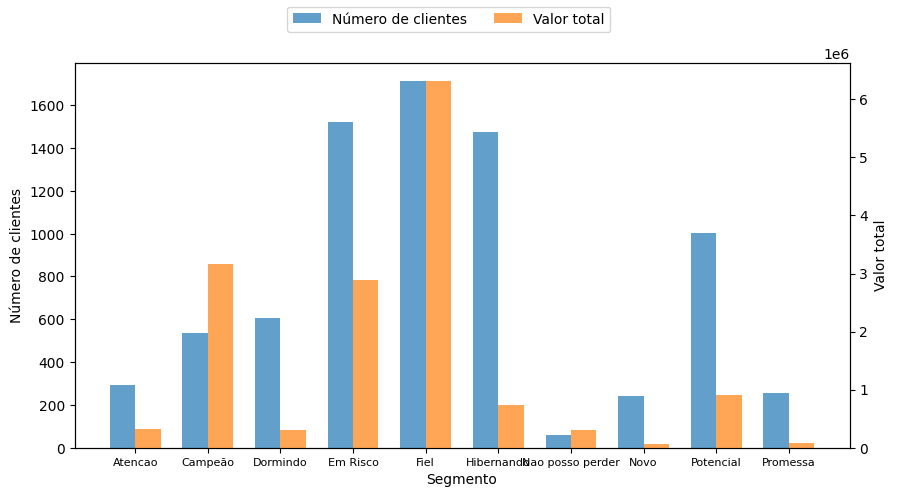

In [ ]:
rfm_agg = rfm.groupby('Segmento').agg({
    'CPF': 'count',
    'valor': 'sum'
}).reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

# define a largura das barras e a posição do eixo X
bar_width = 0.35
x_pos = np.arange(len(rfm_agg['Segmento']))

# plota as barras do número de clientes por segmento
ax.bar(x_pos - bar_width/2, rfm_agg['CPF'], width=bar_width, color='tab:blue', alpha=0.7, label='Número de clientes')
ax.set_xticks(x_pos)
ax.set_xticklabels(rfm_agg['Segmento'], fontsize=8) # ajusta o tamanho da fonte
ax.set_xlabel('Segmento')
ax.set_ylabel('Número de clientes')

# cria o segundo eixo Y para o valor total
ax2 = ax.twinx()

# plota as barras do valor total por segmento
ax2.bar(x_pos + bar_width/2, rfm_agg['valor'], width=bar_width, color='tab:orange', alpha=0.7, label='Valor total')
ax2.set_ylabel('Valor total')

# ajusta as legendas
fig.legend(loc='upper center', ncol=2)

# remove as linhas de grade
ax.grid(False)
ax2.grid(False)

# exibe o gráfico
plt.show()


Por fim, tem-se um resumo da análise através de uma tabela relatório:

In [ ]:
# construindo o relatório final de apresentação da análise
rfv_presnt_agg = rfm.groupby(['Segmento']).agg({
    'recencia': ['mean'],
    'frequencia': ['mean'],
    'valor': ['mean', 'sum']
}).round(1)

rfv_presnt_agg['Consumidores'] = rfm.groupby(['Segmento']).agg({'valor':'count'})
rfv_presnt_agg['%Consumidores'] = (rfv_presnt_agg['Consumidores'] / rfv_presnt_agg['Consumidores'].sum()) * 100

rfv_presnt_agg['Recencia Media'] = rfm.groupby(['Segmento']).agg({'recencia':'mean'})
rfv_presnt_agg['Frequencia Media'] = rfm.groupby(['Segmento']).agg({'frequencia':'mean'})

rfv_presnt_agg['Gasto Médio'] = rfm.groupby(['Segmento']).agg({'valor':'sum'})/rfm.groupby(['Segmento']).agg({'valor':'count'})
rfv_presnt_agg['TM'] = rfv_presnt_agg['Gasto Médio'] / rfv_presnt_agg['Frequencia Media']

rfv_presnt_agg['Compras'] = rfv_presnt_agg['Consumidores'] * rfv_presnt_agg['Frequencia Media']
rfv_presnt_agg['%Compras'] = (rfv_presnt_agg['Compras'] / rfv_presnt_agg['Compras'].sum()) * 100

rfv_presnt_agg['Receita'] = rfm.groupby(['Segmento']).agg({'valor':'sum'})
rfv_presnt_agg['%Receita'] = (rfv_presnt_agg['Receita'] / rfv_presnt_agg['Receita'].sum()) * 100

rfv_presnt_agg.loc['Total'] = rfv_presnt_agg.sum()

def format(x):
        return "R${:.2f}".format(x)
rfv_presnt_agg['Gasto Médio'] = rfv_presnt_agg['Gasto Médio'].apply(format)
rfv_presnt_agg['TM'] = rfv_presnt_agg['TM'].apply(format)
rfv_presnt_agg['Receita'] = rfv_presnt_agg['Receita'].apply(format)

rfv_presnt_agg['%Consumidores'] = rfv_presnt_agg['%Consumidores'].apply(lambda x: f"{x:.1f}%")
rfv_presnt_agg['%Compras'] = rfv_presnt_agg['%Compras'].apply(lambda x: f"{x:.1f}%")
rfv_presnt_agg['%Receita'] = rfv_presnt_agg['%Receita'].apply(lambda x: f"{x:.1f}%")

rfv_presnt_agg.drop('recencia', axis=1, inplace=True)
rfv_presnt_agg.drop('frequencia', axis=1, inplace=True)
rfv_presnt_agg.drop('valor', axis=1, inplace=True)


# mostra o dataset
rfv_presnt_agg

,Consumidores,%Consumidores,Recencia Media,Frequencia Media,Gasto Médio,TM,Compras,%Compras,Receita,%Receita
,,,,,,,,,,
Segmento,,,,,,,,,,
Atencao,291.0,3.8%,135.092784,1.017182,R$1090.74,R$1072.31,296.0,2.6%,R$317404.51,2.1%
Campeão,534.0,6.9%,22.172285,3.069288,R$5918.69,R$1928.36,1639.0,14.5%,R$3160578.01,21.0%
Dormindo,606.0,7.9%,137.150165,1.004950,R$503.89,R$501.40,609.0,5.4%,R$305355.29,2.0%
Em Risco,1520.0,19.7%,244.677632,1.267763,R$1894.57,R$1494.42,1927.0,17.0%,R$2879745.18,19.1%
Fiel,1713.0,22.2%,87.116754,2.163456,R$3685.94,R$1703.73,3706.0,32.8%,R$6314010.87,41.9%
Hibernando,1477.0,19.2%,254.601896,1.002031,R$499.22,R$498.21,1480.0,13.1%,R$737352.47,4.9%
Nao posso perder,61.0,0.8%,279.327869,2.065574,R$4996.03,R$2418.71,126.0,1.1%,R$304757.98,2.0%
Novo,242.0,3.1%,23.342975,1.000000,R$296.22,R$296.22,242.0,2.1%,R$71686.20,0.5%
